<a href="https://colab.research.google.com/github/riyakonaje/MySpace/blob/main/W2V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [5]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
len(gutenberg.fileids())

18

In [8]:
import nltk
nltk.download('punkt')
sent_tokenize(gutenberg.raw())[1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(sent_tokenize(gutenberg.raw())[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
gutenberg.sents()[100]

['You',
 'do',
 'not',
 'think',
 'I',
 'could',
 'mean',
 '_you_',
 ',',
 'or',
 'suppose',
 'Mr',
 '.',
 'Knightley',
 'to',
 'mean',
 '_you_',
 '.']

In [12]:
len(gutenberg.sents())

98503

In [13]:
len(gutenberg.words())

2621613

In [14]:
input_data=gutenberg.sents()

In [15]:
Word2vec_Mode

NameError: ignored

In [16]:
model=Word2Vec(sentences=input_data,size=64, sg=1, window=10, min_count=5,seed=123)

In [17]:
len(model.wv.vocab)

17011

In [18]:
model.wv.most_similar('think')

[('suppose', 0.8595733046531677),
 ('manage', 0.8498735427856445),
 ('anyhow', 0.824190616607666),
 ('_you_', 0.821655809879303),
 ('shouldn', 0.819441556930542),
 ('NOW', 0.8182662725448608),
 ('want', 0.8178225159645081),
 ('mean', 0.8176661729812622),
 ('contradict', 0.8171269297599792),
 ('awfully', 0.8125127553939819)]

In [19]:
model.wv.most_similar('day')

[('morning', 0.7720869183540344),
 ('night', 0.740217924118042),
 ('month', 0.729629635810852),
 ('time', 0.7271935939788818),
 ('evening', 0.7138173580169678),
 ('sabbath', 0.6932279467582703),
 ('week', 0.6814947128295898),
 ('fourteenth', 0.6764274835586548),
 ('Adar', 0.6707282066345215),
 ('morrow', 0.6683012247085571)]

In [23]:
model.wv.doesnt_match("day  evening night".split())

'evening'

In [26]:
model.wv.similarity('mother','queen')

0.4670667

In [29]:
model.wv['good']

array([-5.30979632e-05, -1.76230475e-01,  1.58973694e-01, -1.01658888e-01,
        3.71415466e-01, -6.14040196e-02,  4.07183975e-01, -1.66866601e-01,
        5.35562262e-02,  1.13225214e-01, -7.85587803e-02,  5.70128001e-02,
        1.43867925e-01,  6.59577429e-01,  3.36579859e-01, -1.85185254e-01,
        2.19781756e-01,  3.23652010e-03, -2.72003502e-01,  1.93844587e-01,
        4.00839061e-01,  2.21417293e-01, -6.57119602e-02,  5.96766584e-02,
       -2.43240427e-02,  2.31312186e-01,  2.02178508e-01, -1.46605313e-01,
        1.04499459e-01,  6.22781999e-02, -2.46225327e-01, -1.69897959e-01,
        1.81361526e-01, -2.15559989e-01,  8.48436877e-02,  1.33749664e-01,
        5.86492479e-01,  2.37046942e-01, -7.36165226e-01, -4.22600329e-01,
       -3.78867596e-01,  4.09950256e-01,  3.48141074e-01,  3.70999575e-02,
        1.06002070e-01,  5.23511350e-01,  4.11986142e-01,  1.71462417e-01,
       -3.15774947e-01, -2.15321761e-02,  8.77762884e-02,  5.98812588e-02,
       -1.75221369e-01, -

In [31]:
X=model.wv[model.wv.vocab]

In [32]:
tnse=TSNE(n_components=2,n_iter=250)

In [34]:
x_2d=tnse.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [35]:
wv_df=pd.DataFrame(x_2d,columns=['x','y'])
wv_df['token']=model.wv.vocab.keys()

In [38]:
wv_df.head(n=100)

,x,y,token
0,0.171727,0.702364,[
1,-0.429925,0.671353,Emma
2,-0.315641,-0.250260,by
3,-0.429951,0.697010,Jane
4,0.182975,0.698249,]
...,...,...,...
95,-0.278544,0.509259,friend
96,-0.322714,0.519767,fond
97,-0.007101,0.159584,both
98,-0.264384,0.112897,but


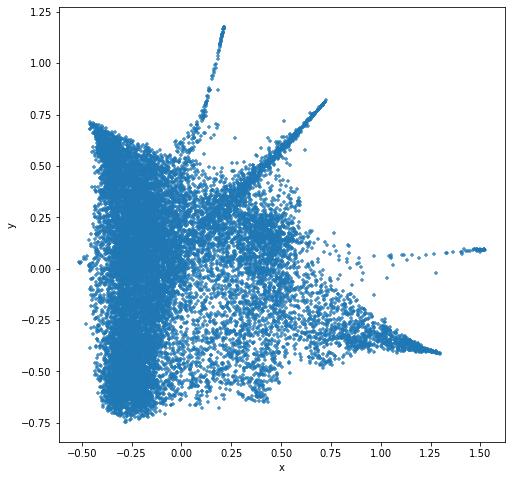

In [52]:

wv_df.plot.scatter('x','y',figsize=(8,8),marker='+',s=10,alpha=0.8)

In [58]:
output_notebook()

In [59]:
sub_wv_df=wv_df.sample(n=7500)

In [60]:
p=figure(plot_width=800,plot_height=800)
_=p.text(x=sub_wv_df.x, y=sub_wv_df.y, text=sub_wv_df.token)

In [62]:
show(p)